# **Bidirectional Encoder Representations from Transformers (BERT)**

BERT stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.


##Load Data
- Twitter US Airline Sentiment dataset: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Create a new column containing the length each headline text
df["text_len"] = df["text"].apply(lambda x : len(x.split()))

In [5]:
data_text = df[['text']]

In [6]:
print("The longest headline has: {} words".format(df.text_len.max()))

The longest headline has: 36 words


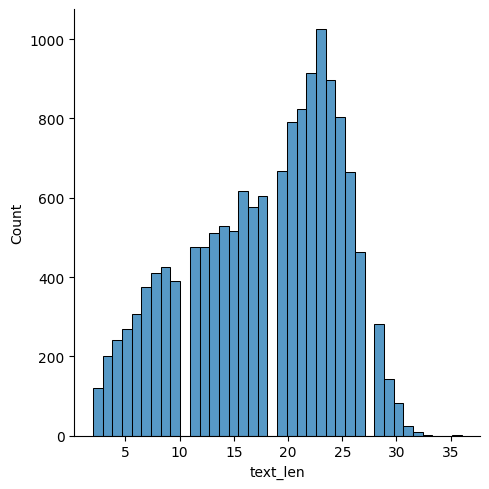

In [7]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df.text_len, kde=False)

In [8]:
for idx in df.sample(3).index:
    headline = df.iloc[idx]
    print("Headline #{}:".format(idx))
    print("Publication date: {}".format(headline.tweet_created))
    print("Text: {}\n".format(headline.text))

Headline #12481:
Publication date: 2015-02-24 02:42:49 -0800
Text: .@AmericanAir Alright prove it: (1/3) 3 days ago, I sat on a plane at JFK for 3 hrs, deplaned for 3 more, and when I re-boarded...

Headline #3966:
Publication date: 2015-02-17 20:22:41 -0800
Text: @united tried to check it 40 mins before a flight rather than 45 mins and we are stonewalled by your employees...

Headline #13961:
Publication date: 2015-02-22 18:30:16 -0800
Text: @AmericanAir you guys fail again.. all I need to do is use my voucher for a ticket but I can't do it online #yourphonesystemsucks



## BERT for Sentiment Analysis

We will do the following operations to train a sentiment analysis model:

- Install Transformers library;
- Load the BERT Classifier and Tokenizer alıng with Input modules;
- Download the IMDB Reviews Data and create a processed dataset (this will take several operations;
- Configure the Loaded BERT model and Train for Fine-tuning
- Make Predictions with the Fine-tuned Model


### Intalling the Transformers library from Huggingface
Huggingface's Transformers Library provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation, etc in 100+ languages. Its aim is to make cutting-edge NLP easier to use for everyone.

In [9]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install transformers

###Pretrained Models from Hugging Face
- Hugging Face Documentation: https://huggingface.co/transformers/v3.3.1/pretrained_models.html
- BERTSequenceClassification: https://huggingface.co/transformers/v3.3.1/model_doc/bert.html#bertforsequenceclassification
- BERTSequenceClassifcation with TensorFlow Backend: https://huggingface.co/transformers/v3.3.1/model_doc/bert.html#tfbertforsequenceclassification



In [10]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

#num_labels should set to 3 because it is a multi-class classification
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels = 3)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [11]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109484547 (417.65 MB)
Trainable params: 109484547 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Twitter US Airline Sentiment dataset and Preprocess

In [12]:
import re
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# to remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# to remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [13]:
df['text'] = df['text'].apply(remove_URL)
df['text'] = df['text'].apply(remove_html)
df['text'] = df['text'].apply(alpha_num)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_len
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,VirginAmerica What dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),4
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,VirginAmerica plus youve added commercials to ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),9
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,VirginAmerica I didnt today Must mean I need t...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),12
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,VirginAmerica its really aggressive to blast o...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),17
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,VirginAmerica and its a really big bad thing a...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),10


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['airline_sentiment'])
df['labels'] = label_encoder.transform(df['airline_sentiment'])

In [15]:
#Inspect the labels generated by a label encoder alongside their corresponding true classes
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)

{'negative': 0, 'neutral': 1, 'positive': 2}


In [16]:
from sklearn.model_selection import train_test_split
# train-test split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df['text'], df['labels'], test_size=0.2, random_state=5, stratify=df['labels'])

In [17]:
train =pd.DataFrame([train_sentences, train_labels]).T
train.head()

,text,labels
11535,usairways usairways unacceptable holdtime REALLY,0
650,united so youre telling me there is no number ...,0
11428,USAirways Have him call me I cant wait to see...,0
12402,AmericanAir have you seen Blue Go look it up,2
9979,USAirways on the phone over an hour waiting fo...,0


In [18]:
test = pd.DataFrame([test_sentences, test_labels]).T
test.head()

,text,labels
14064,AmericanAir it wasnt really about the delay It...,0
10221,USAirways job well done from your Philly emplo...,2
12091,AmericanAir thanks,2
1943,united they let us board again but will we fly...,0
1470,united it was delivered Thank you for making s...,2


###  Create the Input Sequences

We have two pandas Dataframe objects waiting for us to convert them into suitable objects for the BERT model. We will take advantage of the InputExample function that helps us to create sequences from our dataset.

https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/processors#transformers.InputExample

Now we will create two main functions:

— convert_data_to_examples: This will accept our train and test datasets and convert each row into an InputExample object.

— convert_examples_to_tf_dataset: This function will tokenize the InputExample objects, then create the required input format with the tokenized objects, finally, create an input dataset that we can feed to the model.

In [19]:
import tensorflow as tf
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN):
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, tokenizer, max_len=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            padding='max_length',
            max_length=max_len, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )

DATA_COLUMN = 'text'
LABEL_COLUMN = 'labels'

In [20]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

### Configuring the BERT model and Fine-tuning
We will use Adam as our optimizer, CategoricalCrossentropy as our loss function, and SparseCategoricalAccuracy as our accuracy metric.



In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
732/732 [==============================] - 267s 294ms/step - loss: 0.4070 - accuracy: 0.8455 - val_loss: 0.5228 - val_accuracy: 0.8258
Epoch 2/2
732/732 [==============================] - 207s 283ms/step - loss: 0.1404 - accuracy: 0.9546 - val_loss: 0.7060 - val_accuracy: 0.8234


### Making Predictions

In [22]:
pred_sentences = ['Thank you JetBlue',
                  'Most terrible experience I have ever had ',
                  'the flight was so great!',
                  'Never fly United again']

We need to tokenize our reviews with our pre-trained BERT tokenizer. We will then feed these tokenized sequences to our model and run a final softmax layer to get the predictions. We can then use the argmax function to determine whether our sentiment prediction for the review is positive or negative. Finally, we will print out the results with a simple for loop. The following lines do all of these said operations:

In [23]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
print(tf_outputs)

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-1.9933062,  0.3350839,  3.0861487],
       [ 4.4673834, -1.642311 , -3.5371742],
       [-1.947284 , -2.06678  ,  4.289196 ],
       [ 4.438193 , -1.6332006, -3.6024544]], dtype=float32)>, hidden_states=None, attentions=None)


In [24]:
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
print(tf_predictions)

tf.Tensor(
[[5.8157165e-03 5.9677452e-02 9.3450683e-01]
 [9.9745136e-01 2.2155684e-03 3.3308612e-04]
 [1.9495317e-03 1.7299508e-03 9.9632049e-01]
 [9.9737680e-01 2.3019006e-03 3.2125539e-04]], shape=(4, 3), dtype=float32)


In [25]:
#{'negative': 0, 'neutral': 1, 'positive': 2}
labels = ['0','1','2']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
print(label)

[2 0 2 0]


In [26]:
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": ", label[i])

Thank you JetBlue :  2
Most terrible experience I have ever had  :  0
the flight was so great! :  2
Never fly United again :  0
